<a href="https://colab.research.google.com/github/anthonywu2000/Human-Activity-Recognition/blob/main/Human_Activity_Recognition_Algorithms_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings

# **Importing Dataset**

In [4]:
# ignore this if running on Jupyter
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv
Saving test.csv to test (1).csv


In [5]:
import io

# change to file path when running on Jupyter
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [ ]:
print(df_train.shape)
print(df_test.shape)
df_train.head(n = 10)

In [ ]:
df_test.head(n = 10)

# **Dataset Cleaning and Checking**

In [8]:
df_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,-0.306043,-0.557121,0.523551,0.387386,0.594374,-0.547569,-0.820041,-0.901874,-0.845784,-0.684345,-0.643770,-0.631069,-0.102993,-0.137937,-0.163946,-0.116599,0.102762,-0.037786,0.130477,-0.026229,0.026322,0.159966,-0.019575,0.009420,0.033291,0.036587,-0.078640,-0.125131,-0.193802,0.105005,...,-0.678618,-0.347657,-0.877995,0.178195,-0.312968,-0.615441,-0.693210,-0.692876,-0.674830,-0.726645,-0.885103,-0.693210,-0.874292,-0.719795,-0.087878,-0.889442,-0.046516,-0.253649,-0.565425,-0.779376,-0.792391,-0.772836,-0.811409,-0.871927,-0.779376,-0.935785,-0.771497,-0.284627,-0.898859,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,0.282243,0.293867,0.363594,0.343611,0.297818,0.471808,0.259607,0.126333,0.221983,0.371608,0.371581,0.386569,0.468959,0.437268,0.371363,0.306507,0.246593,0.243635,0.230067,0.257383,0.215001,0.208837,0.221432,0.

No outliers, as the values are squeezed between -1 and 1 (min and max)

In [12]:
# check for duplicate values
print("Duplicated rows in training set: {} \n" .format(sum(df_train.duplicated())))
print("Duplicated rows in test set: {} \n" .format(sum(df_test.duplicated())))

Duplicated rows in training set: 0 

Duplicated rows in test set: 0 



In [13]:
# check for null values
print("Nulls in  in training set: {} \n" .format(df_train.isnull().values.sum()))
print("Nulls in  in test set: {} \n" .format(df_test.isnull().values.sum()))

Nulls in  in training set: 0 

Nulls in  in test set: 0 



In [14]:
# check for NaN values
print("NaN in  in training set: {} \n" .format(df_train.isna().values.sum()))
print("NaN in  in test set: {} \n" .format(df_test.isna().values.sum()))

NaN in  in training set: 0 

NaN in  in test set: 0 



No data cleaning is needed, as there are no null or NaN values in this dataset.



Below, we can change the column names for simplificationn

In [15]:
columnsTrain = df_train.columns # or test is fine

columnsTrain = columnsTrain.str.replace('[()]', '') # Python in-built str to replace chars
columnsTrain = columnsTrain.str.replace('[-]', '')
columnsTrain = columnsTrain.str.replace('[,]', '')

df_train.columns = columnsTrain
df_test.columns = columnsTrain

df_train.head(n = 10)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagentropy,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0

# **Data Visualization and Exploration**

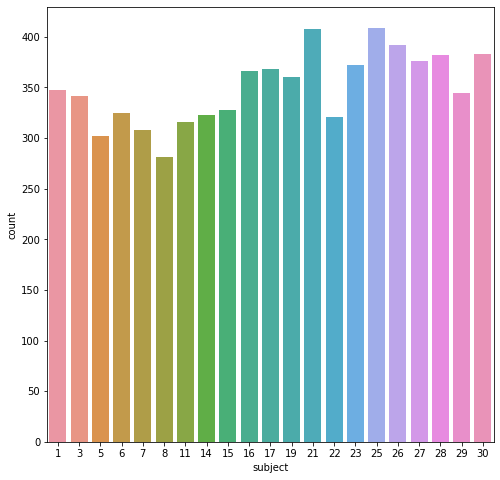

In [ ]:
plt.figure(figsize = (8,8))
sns.countplot(x='subject', data = df_train)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

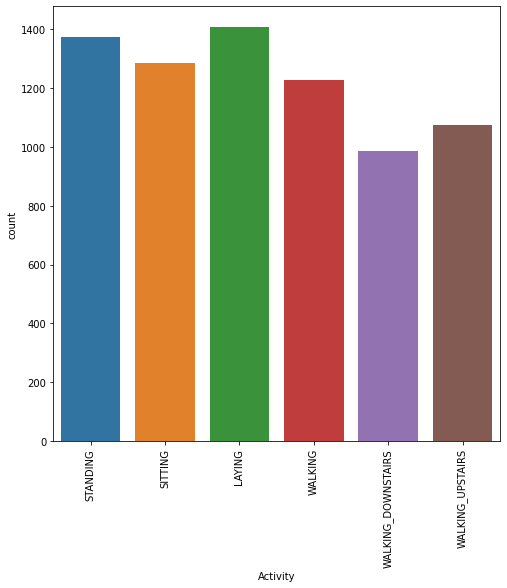

In [ ]:
plt.figure(figsize = (8,8))
sns.countplot(x='Activity', data = df_train)
plt.xticks(rotation = 90)

The two graphs above shows the countplot for categorical variables. It is observed that the distributions for each category are roughly equal, so there is no huge gap among the number of data for each categories.

We can check a more advanced countplot below that combines the information from the above two plots.

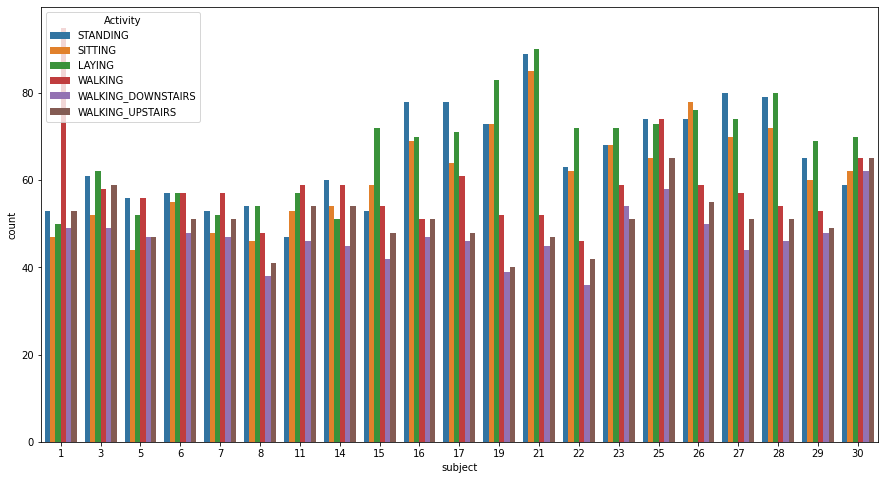

In [ ]:
plt.figure(figsize = (15, 8))
sns.countplot(x='subject', hue='Activity', data = df_train)

In addition, we can verify that there is no huge gap in the number data of each activities by checking class imbalance.

In [ ]:
df_train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

Indeed, each of the classes have close enough values, so class imbalance isn't a problem here.

We can also plot Kernel Density Plot to visualize the probability distributions as smoothed density curves for each of the features.
For simplicity, only selected features are plotted. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


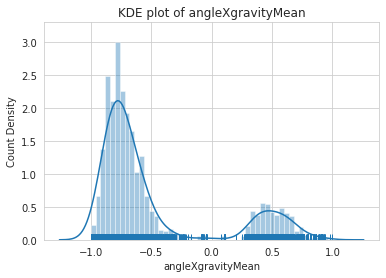

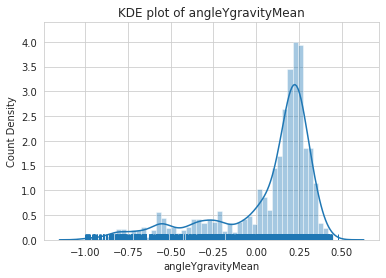

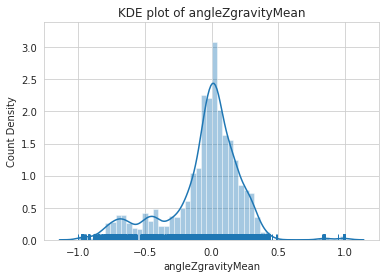

In [ ]:
def plot_density(data, features, bins = 50, hist = True):
  for feature in features:
    sns.set_style("whitegrid")
    sns.distplot(data[feature], bins = bins, rug = True, hist = hist)
    plt.title("KDE plot of " + feature)
    plt.xlabel(feature)
    plt.ylabel('Count Density')
    
    warnings.filterwarnings('ignore')
    plt.show()

sample_features_1 = ['angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean']
plot_density(df_train, sample_features_1)


In order to show relationships between categorical and numerical variables, we can show the distributions via Box Plots and Violine Plots.

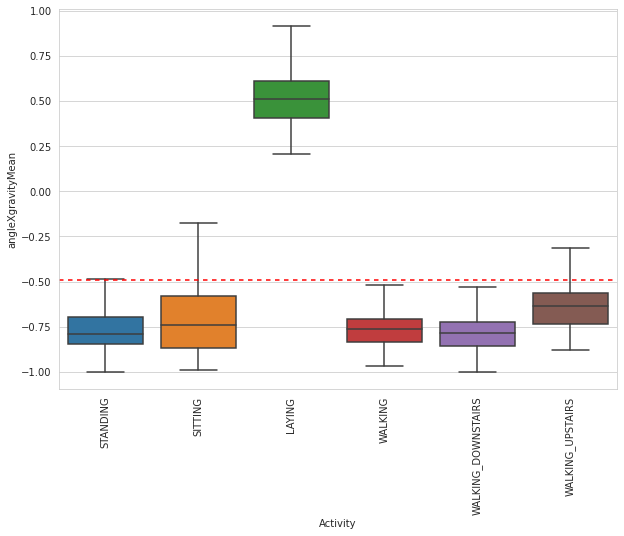

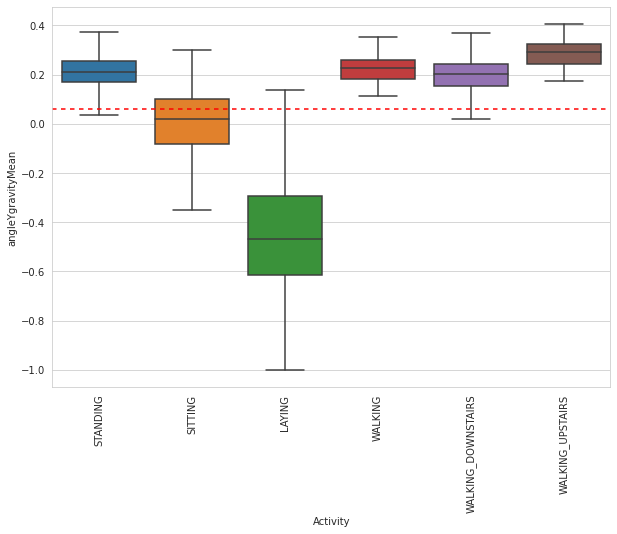

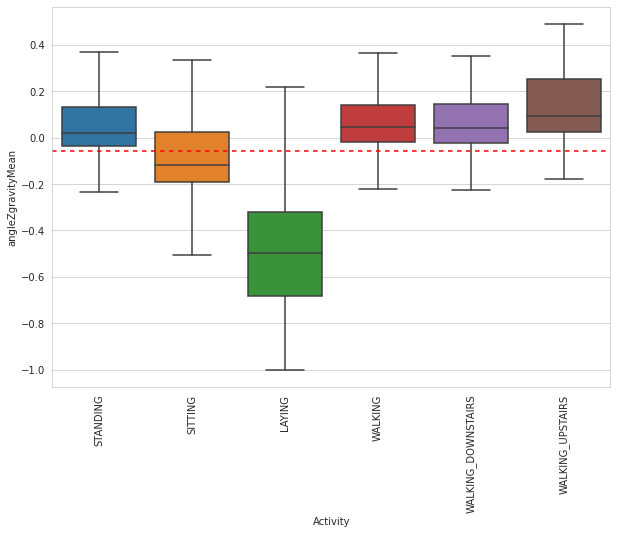

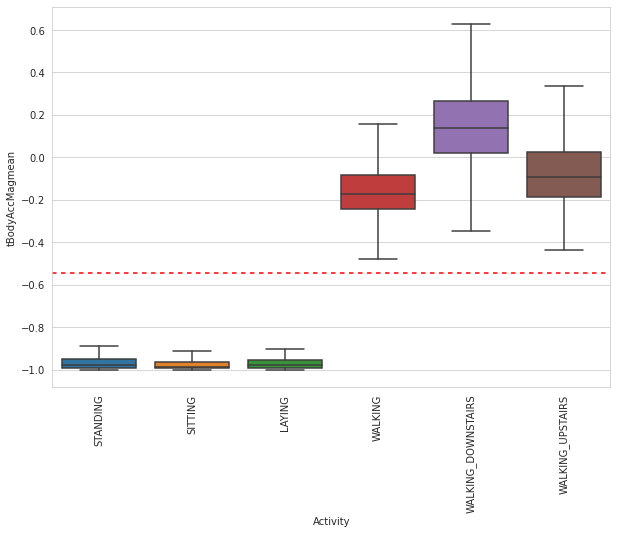

In [ ]:
def plot_box(data, features, x = 'Activity'):
  for feature in features: 
    plt.figure(figsize = (10, 7))
    sns.set_style("whitegrid")
    sns.boxplot(x = x, data = df_train, y = data[feature], showfliers = False)
    plt.axhline(y = np.mean(data[feature]), dashes = (3,3), color = 'red')
    plt.xlabel('Activity')
    plt.ylabel(feature)
    plt.xticks(rotation = 90)
    plt.show()

sample_features_1.append('tBodyAccMagmean')
plot_box(df_train, sample_features_1)

As shown, the features shown for the activity "Laying" seems to have data points that are far away from the mean of the features (shown in red dash). We can almost be certain that if angleXgravityMean is greater than or equal to 0, then the activity is "Laying". Some of the values in angleYgravityMean boxplot does not lead to the assumption that if  angleYgravityMean is below some certain value, then it must be a "Laying" activity. This observation also  applies to angleZgravityMean, as some portion of the values in angleZgravityMean for "Laying" overlaps with "Sitting".

All of the data values in the last three activities for the last boxplot are greater than the mean. In addition, we can also conclude from the last boxplot that when tBodyAccMagmean is greater than -0.5, then the activity is most likely to be "active" (Walking, Walking upstairs, Walking downstairs). When tBodyAccMagmean is less than -0.8, we can be certain that the activity is "static" (Standing, Sitting,  Laying).

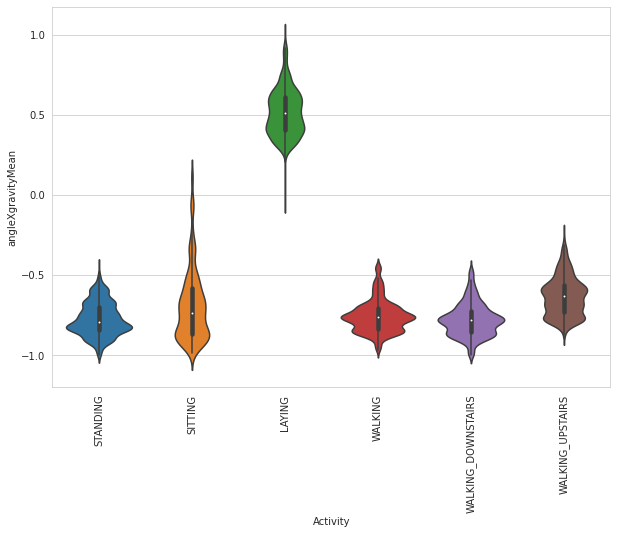

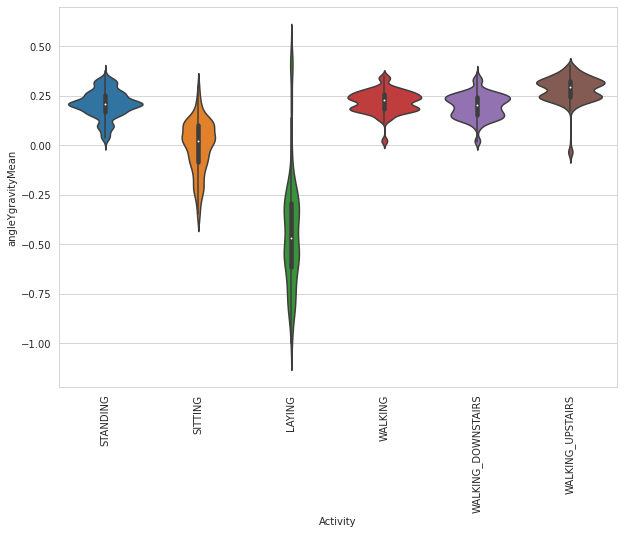

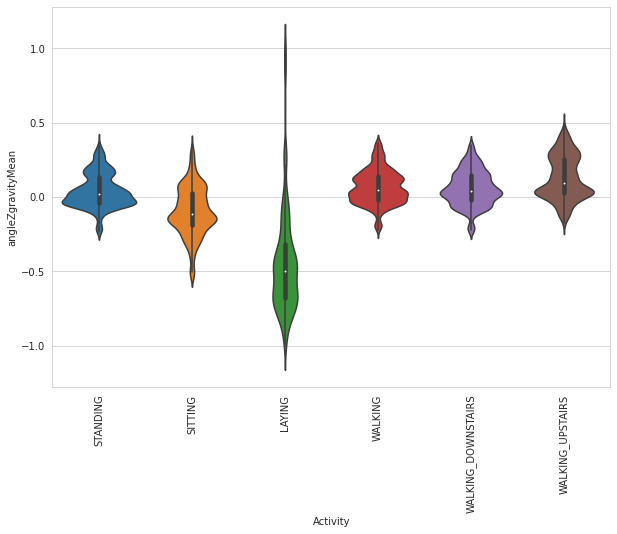

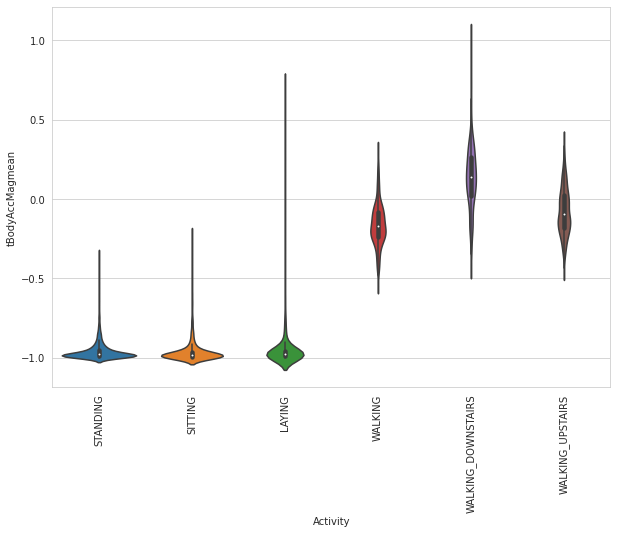

In [ ]:
def plot_violin(data, features, x = 'Activity'):
  for feature in features:
    plt.figure(figsize = (10, 7))
    sns.set_style("whitegrid")
    sns.violinplot(x = x, data = df_train, y = data[feature])
    plt.xlabel('Activity')
    plt.ylabel(feature)
    plt.xticks(rotation = 90)
    plt.show()

plot_violin(df_train, sample_features_1)

In below, we can reduce the dimensionality of the training dataset by PCA. 

In [16]:
# PCA Dimensionality Reduction
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

matrix_for_reduction = df_train.drop(['subject', 'Activity'], axis = 1)

scaler = StandardScaler()
scaler.fit_transform(matrix_for_reduction)

# model_pca = PCA(n_components = None)
model_pca = PCA(n_components = 50)
components = model_pca.fit_transform(matrix_for_reduction)

total_var = model_pca.explained_variance_ratio_.sum() * 100

figure = px.scatter(components, x = 0, y = 1, title=f'Total Explained Variance: {total_var:.3f}', color = df_train['Activity'])
figure.show()

We can try 3D visualization of PCA as 2D visualization of data points are too tightly clustered together.

In [17]:
model_pca_1 = PCA(n_components = 50)
components_1 = model_pca_1.fit_transform(matrix_for_reduction)

total_var_1 = model_pca_1.explained_variance_ratio_.sum() * 100

figure_1 = px.scatter_3d(components_1, x = 0, y = 1, z = 2, title = f'Total Explained Variance: {total_var_1:.3f}%', color = df_train['Activity'])
figure_1.show()

Furthurmore, we can plot the cumulative explained variance plot given *n* principal components. In the example above, we checked if we could reduce the dimension to 50, which turns out to have 93% of explained variance. The below graph shows the trend that when the number of principal components increase, then the explained variance also increases.

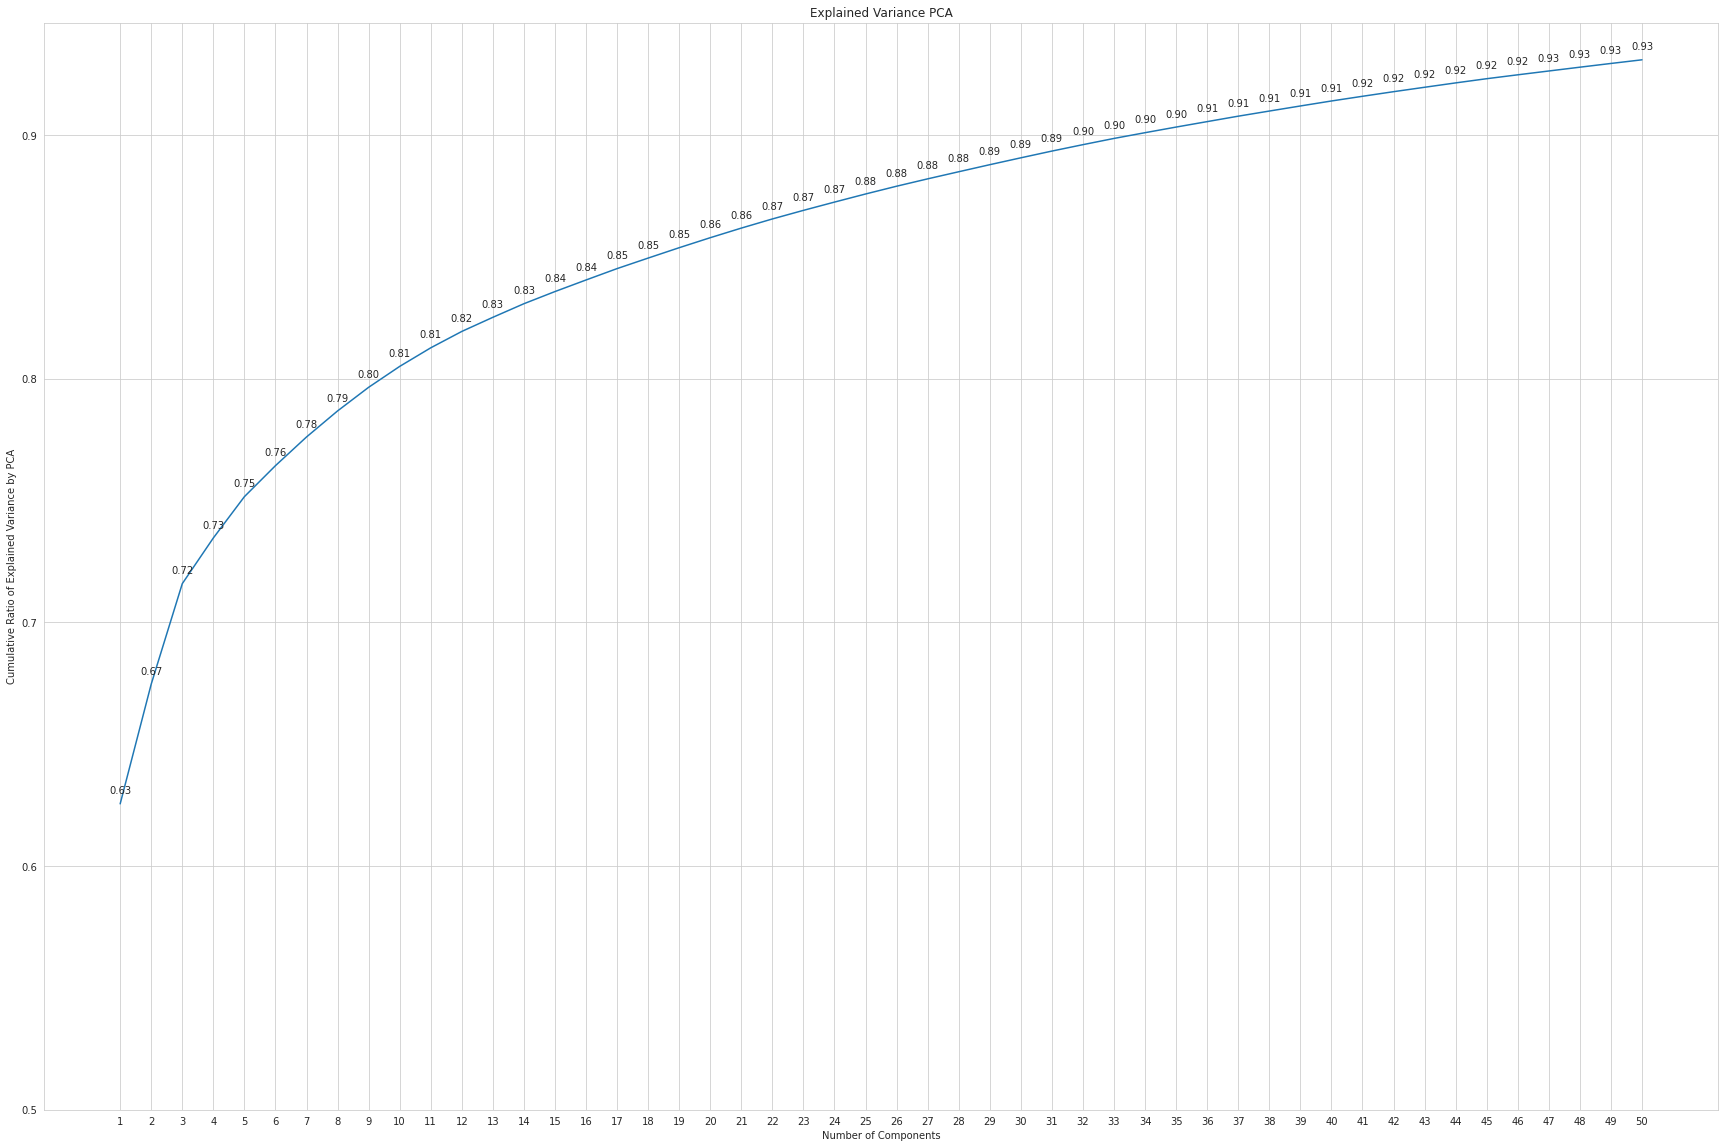

In [19]:
xp = np.arange(1, 51, 1)
yp = np.cumsum(model_pca.explained_variance_ratio_)

def plot_explained_variance_ratio(x_val, y_val):
  plt.figure(figsize = (30, 20))
  plt.plot(x_val, y_val)
  sns.set_style("whitegrid")
  for x_lab, y_lab in zip(x_val, y_val):
    label = "{:.2f}".format(y_lab)
    plt.annotate(label, (x_lab, y_lab), textcoords = "offset points", xytext = (0, 10), ha = 'center')
  plt.xticks(x_val)
  plt.yticks(np.arange(0.5, 1.0, 0.1))
  plt.title("Explained Variance PCA")
  plt.xlabel("Number of Components")
  plt.ylabel("Cumulative Ratio of Explained Variance by PCA")
  plt.show()

plot_explained_variance_ratio(x_val = xp, y_val = yp)

As we see from the 2D and 3D plots of reduced dimensionality, we obeserve that the data points are too tightly clustered together. However, it can be seen that all the "static" activities are clustered together (Standing, Sitting, and Laying) while the "active" activities are clustered tightly (Walking, Walking downstairs, Walking upstairs) due to the fact that they are similar in nature.

In order too visualize the scatter plot clearly by reducing dimensionality and not loosing too much original information, we can visualize the data with t-SNE that finds patterns based on similarity of data points with multiple features. 

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.72 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


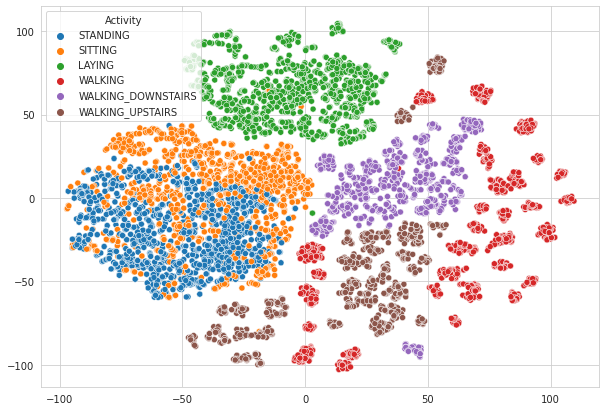

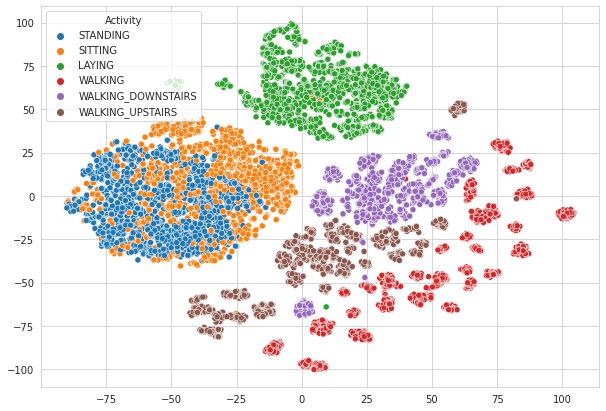

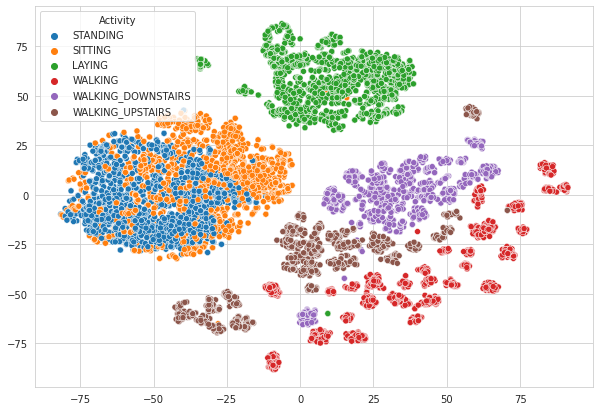

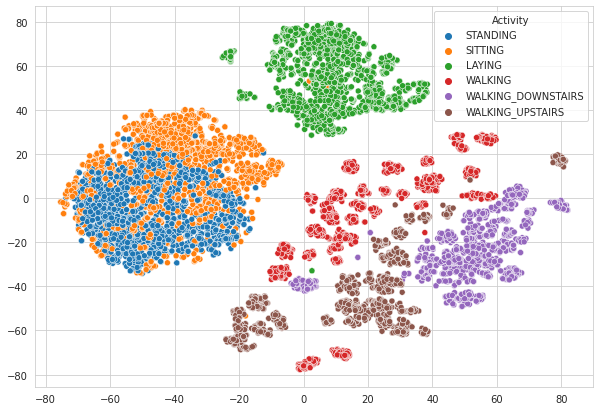

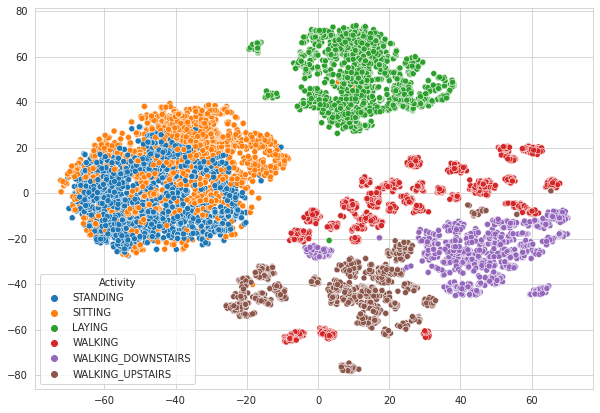

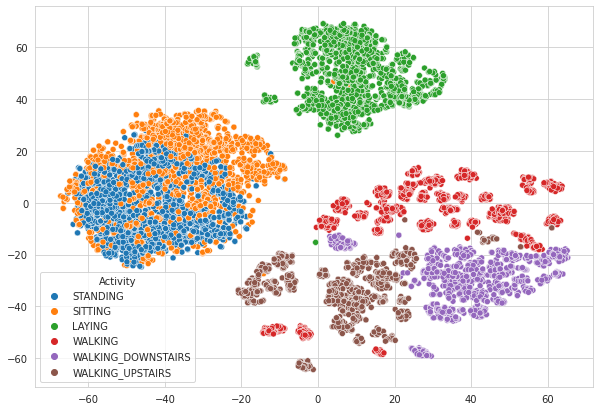

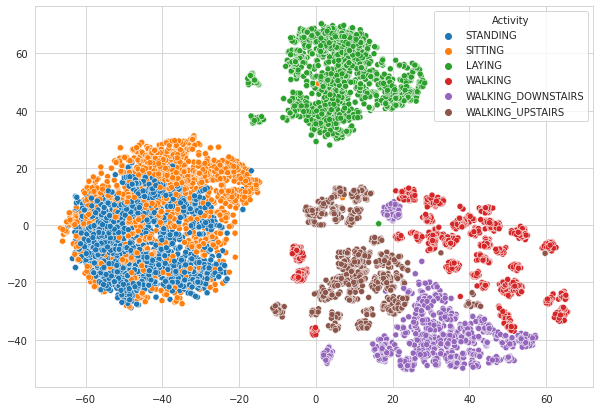

In [ ]:
from sklearn.manifold import TSNE
import time

perplexity_levels = [10, 20, 30, 40, 50, 60, 70]
for i in perplexity_levels:
  %time
  model_tsne = TSNE(n_components = 2, perplexity = i, random_state = 42)
  fitted_model_tsne = model_tsne.fit_transform(matrix_for_reduction)
  plt.figure(figsize = (10, 7))
  sns.scatterplot(x = fitted_model_tsne[:, 0], y = fitted_model_tsne[:, 1], hue = df_train["Activity"])

From the seven t-SNE plots with different perplexity levels, we can easily see that the higher the perplexity, the clearer the shapes of each clusters are displayed. We can identify that "Laying" activity has its own cluster, which means that the data pertaining to the activity is very distinct from the rest of the activities. We can also identify that "Standing" and "Sitting" are tightly clustered together, and the three walking activities are somewhat close to one another. 

# **Data Preprocessing**

We separate the categories (classes) from the actual numerical data used for training.

In [20]:
y_train = df_train.Activity
X_train = df_train.drop(['subject', 'Activity'], axis = 1)

y_test = df_test.Activity
X_test = df_test.drop(['subject', 'Activity'], axis = 1)

# **Feature Selection**

In [ ]:
# Make a random forest classifier on the X_train (n_estimators = 500, random_state = 42)
from sklearn.ensemble import RandomForestClassifier

selection_classifier = RandomForestClassifier(n_estimators = 500, criterion = 'gini', random_state = 42)
selection_classifier.fit(X_train, y_train)

importances = selection_classifier.feature_importances_ # Gini importance with respect to the features' order

indices = np.argsort(importances)[::-1] # sort from largest to smallest

for x in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (x + 1, 40, X_train.columns[indices[x]], importances[indices[x]]))

In [ ]:
# Insert the selected features (SelectFromModel) into the list and make print the first few lines with their scores
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(estimator = selection_classifier, threshold = 'mean', prefit = True) # mean of the feature importances
X_train_filtered = sfm.transform(X_train)
X_test_filtered = sfm.transform(X_test)

train_filtered_features = []
test_filtered_features = []

for feats in sfm.get_support(indices = True):
  train_filtered_features.append(X_train.columns[feats])
for feats in sfm.get_support(indices = True):
  test_filtered_features.append(X_test.columns[feats])

def similar(list1, list2):
  return list1 == list2

similar(train_filtered_features, test_filtered_features) # check if features of train and test set are the same

In [ ]:
# TODO: refactor for threshold value flexibility


  

*   K-Nearest Neighbors
*   Logistic Regression
*   Gaussian Naive Bayes
*   Decision Tree Classifier
*   Support Vector Machine
*   Stacking Classifier